In [ ]:
import yfinance
import numpy
import matplotlib
import pandas

In [ ]:
ticker_list = ["GC=F","SIL=F","PL=F","PA=F"]
df=pandas.DataFrame()
for ticker_symbol in ticker_list:
  ticker = yfinance.Ticker(ticker_symbol)
  historical_data = ticker.history(period="1y").loc['2024-05-02':'2024-06-02']
  df[ticker_symbol]=historical_data['Close']

In [ ]:
df

,GC=F,SIL=F,PL=F,PA=F
Date,,,,
2024-05-02 00:00:00-04:00,2299.199951,26.583000,956.700012,938.200012
2024-05-03 00:00:00-04:00,2299.000000,26.445000,959.599976,947.500000
2024-05-06 00:00:00-04:00,2321.600098,27.368999,959.299988,982.299988
2024-05-07 00:00:00-04:00,2315.199951,27.302999,981.400024,978.799988
2024-05-08 00:00:00-04:00,2313.600098,27.361000,978.599976,955.400024
2024-05-09 00:00:00-04:00,2332.100098,28.132000,984.700012,970.400024
2024-05-10 00:00:00-04:00,2367.300049,28.275000,1001.099976,980.799988
2024-05-13 00:00:00-04:00,2336.100098,28.221001,1005.299988,964.900024
2024-05-14 00:00:00-04:00,2353.399902,28.485001,1039.300049,981.500000


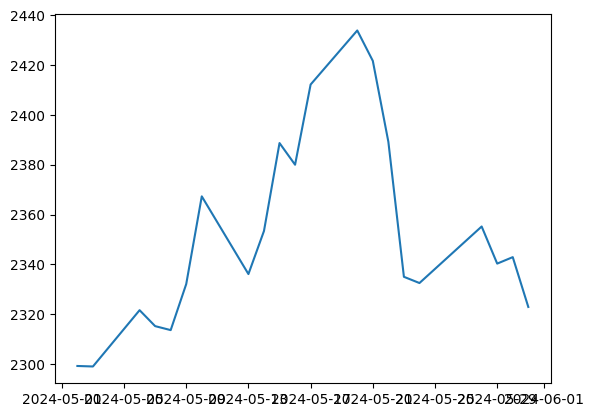

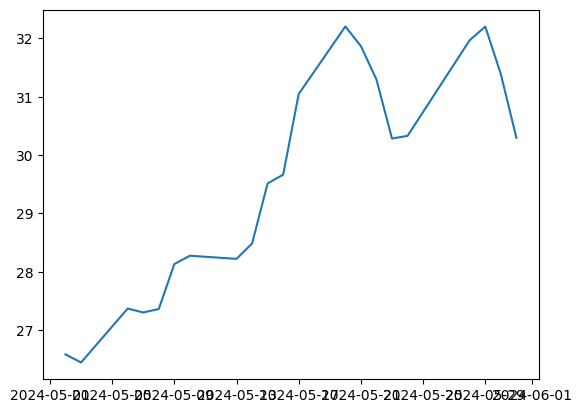

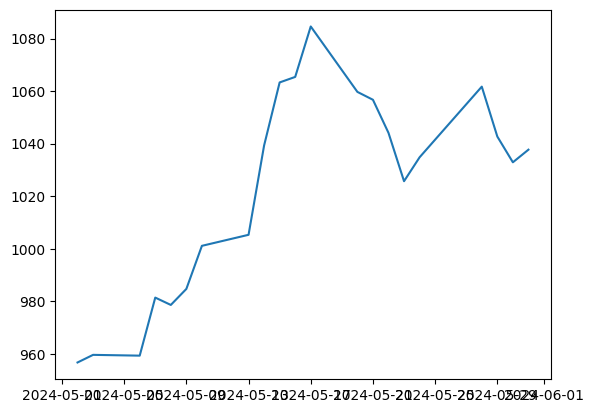

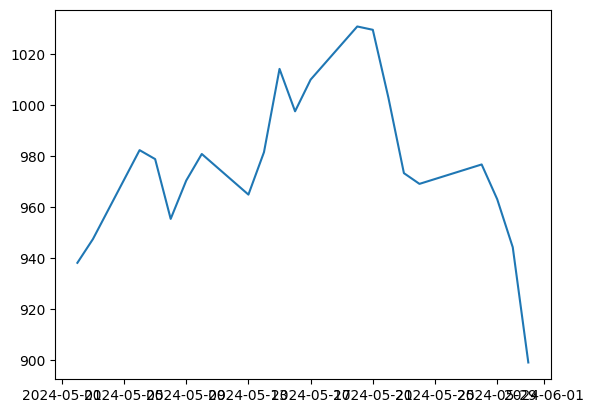

In [ ]:
for ticker_symbol in ticker_list:
  matplotlib.pyplot.plot(df[ticker_symbol])
  matplotlib.pyplot.show()

In [ ]:
S=[[df[ticker_1].cov(df[ticker_2])/df[ticker_1].std()/df[ticker_2].std() for ticker_1 in ticker_list] for ticker_2 in ticker_list]

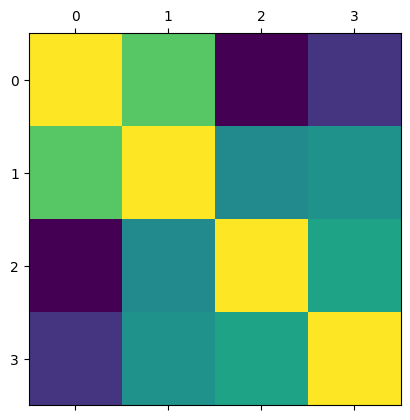

In [ ]:
matplotlib.pyplot.matshow(S)


In [ ]:
V=numpy.linalg.inv(S)

In [ ]:
D=numpy.linalg.eig(S)[0]


In [ ]:
D

array([2.16627788, 1.27616286, 0.11337405, 0.44418521])

In [ ]:
from scipy.stats import spearmanr
SP=[[spearmanr(df[ticker_1], df[ticker_2])[0] for ticker_1 in ticker_list] for ticker_2 in ticker_list]

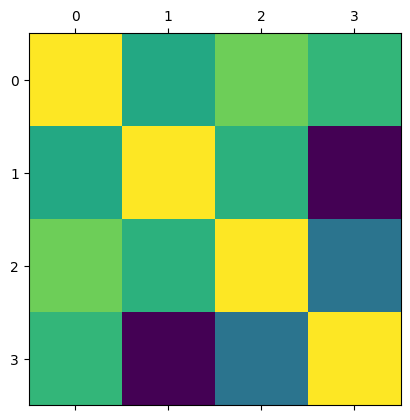

In [ ]:
matplotlib.pyplot.matshow(SP)

In [ ]:
from scipy.stats import kendalltau
ST=[[kendalltau(df[ticker_1], df[ticker_2])[0]for ticker_1 in ticker_list] for ticker_2 in ticker_list]

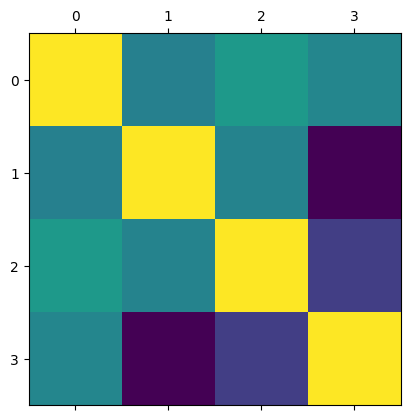

In [ ]:
matplotlib.pyplot.matshow(ST)

In [ ]:
def beta(x,y):
  xr=numpy.log(x/x.shift(1))
  yr=numpy.log(y/y.shift(1))
  return xr.cov(yr)/numpy.var(xr)
def alpha(x,y):
  xr=numpy.log(x/x.shift(1))
  yr=numpy.log(y/y.shift(1))
  return yr.mean()-beta(x,y)*xr.mean()

In [ ]:
A=[[alpha(df[ticker_1], df[ticker_2]) for ticker_1 in ticker_list] for ticker_2 in ticker_list]

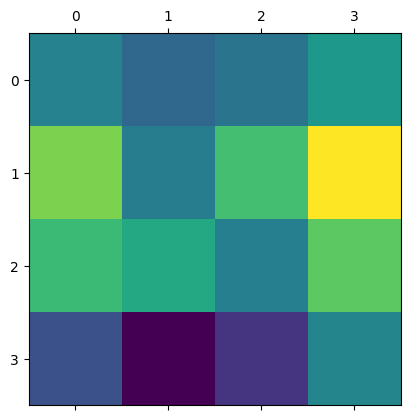

In [ ]:
matplotlib.pyplot.matshow(A)